# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn import set_config
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier

import plotly.express as px
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Dataset

In [ ]:
df=pd.read_csv("heart.csv")

In [ ]:
data=df.copy()

In [ ]:
print("There are", df.shape[0], "observations and", df.shape[1], "columns in the dataset")


There are 918 observations and 12 columns in the dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Data Visualisation

In [ ]:
df.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe(include = ['object']).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [ ]:
px.imshow(df.corr(),title="Correlation Plot of the Heart Failure Prediction",width=500, height=500)

In [ ]:
fig=px.histogram(df, x="Sex", hover_data=df.columns, title="Ratio of male and female in the Data",width=450, height=450)
fig.show()

In [ ]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df, x="HeartDisease", color="Sex", hover_data=df.columns, title="Distribution of Heart Diseases", barmode="group",width=500, height=500)
fig.show()

<AxesSubplot:xlabel='Age'>

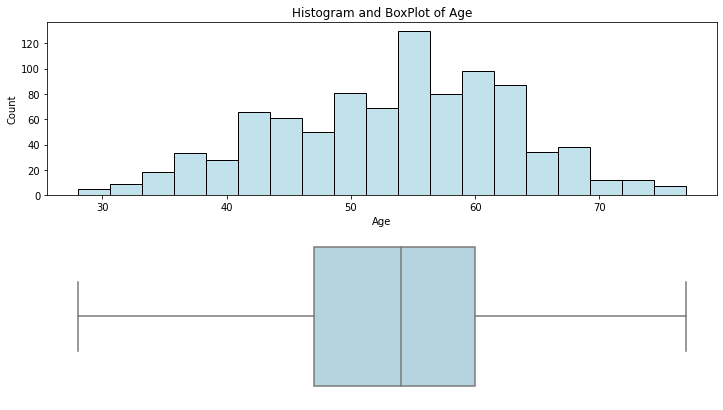

In [ ]:
fig = plt.figure(figsize=(12, 7))
grid = GridSpec(nrows=2, ncols=1, figure=fig)
color = 'lightblue'

ax0 = fig.add_subplot(grid[0, :])
ax0.set_title(f'Histogram and BoxPlot of Age')
sns.histplot(df['Age'], ax=ax0, color=color)

ax1 = fig.add_subplot(grid[1, :])
plt.axis('off')
sns.boxplot(x=df['Age'], ax=ax1, color=color)

In [ ]:
fig = px.histogram(df, x="ChestPainType", color="HeartDisease",title='Count of people for each Chest Pain Type',width=500, height=500)
fig.show()

In [ ]:
fig=px.histogram(df, x="ChestPainType", color="Sex", hover_data=df.columns, title="Sex distribution for each Chest Pain Type",width=500, height=500)
fig.show()

In [ ]:
fig=px.histogram(df, x="RestingECG", hover_data=df.columns, title="Distribution of Resting ECG",width=500, height=500)
fig.show()

In [ ]:
fig = px.histogram(df, x="RestingECG", color="HeartDisease",title='Distribution of Resting ECG in people having disease or not',width=550, height=500)
fig.show()

In [ ]:
fig=px.histogram(df, x="ExerciseAngina", hover_data=df.columns, title="Distribution of Exercise Angina",width=500, height=500)
fig.show()

In [ ]:
fig = px.histogram(df, x="ExerciseAngina", color="HeartDisease",title='Distribution of Exercise Angina in people having disease or not',width=505, height=500)
fig.show()

In [ ]:
fig=px.histogram(df, x="ST_Slope", hover_data=df.columns, title="Distribution of ST_Slope",width=500, height=500)
fig.show()

In [ ]:
fig = px.histogram(df, x="ST_Slope", color="HeartDisease",title='Distribution of ST_Slope in people having disease or not',width=505, height=500)
fig.show()

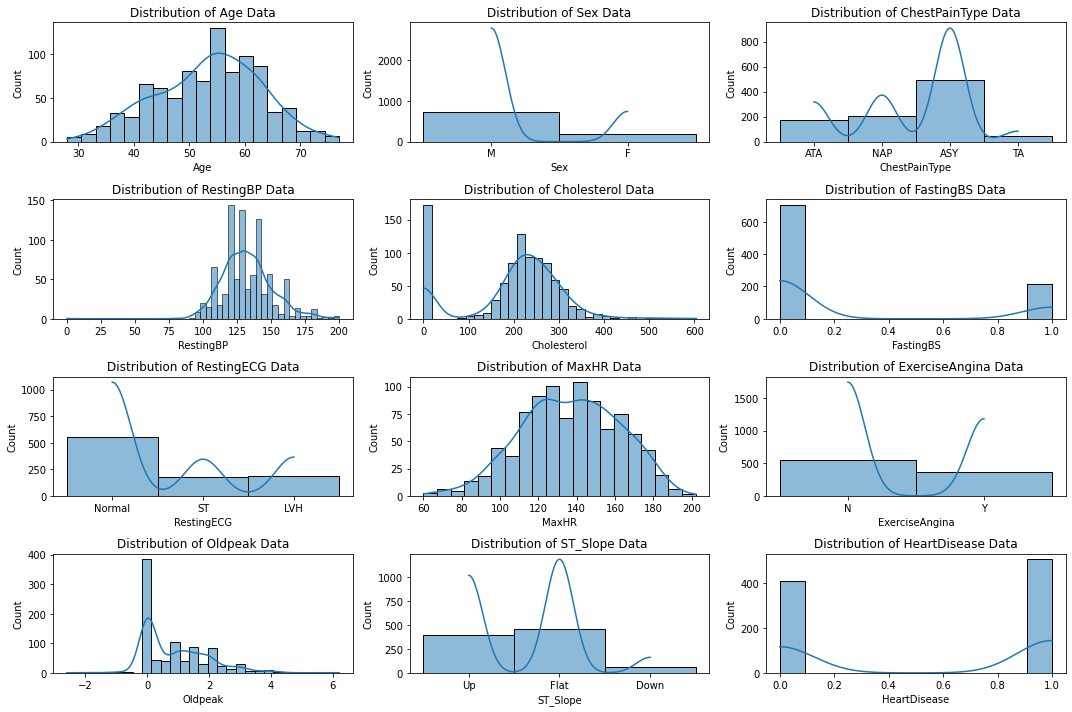

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.title(f"Distribution of {col} Data")
    plt.plot()

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode(df1):
  lbcode=LabelEncoder()
  c=df1.columns
  data_type=list(df1.dtypes)
  for i in range(len(c)):
    if(data_type[i]=='O'):
      df1[c[i]]=lbcode.fit_transform(df1[c[i]])
  return df1

df=encode(df)

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,0.781046,0.956519,0.0,0.00,0.0,2.0,3.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.989107,0.631671,0.0,1.00,1.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [ ]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#df.describe(include=object).T


In [ ]:
df_y=df["HeartDisease"]

In [ ]:
df_x=df.drop(columns="HeartDisease")

In [ ]:
df_x.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,0.781046,0.956519,0.0,0.00,0.0,2.0,3.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.989107,0.631671,0.0,1.00,1.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [ ]:
df_y.describe()


count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

1    508
0    410
Name: HeartDisease, dtype: int64


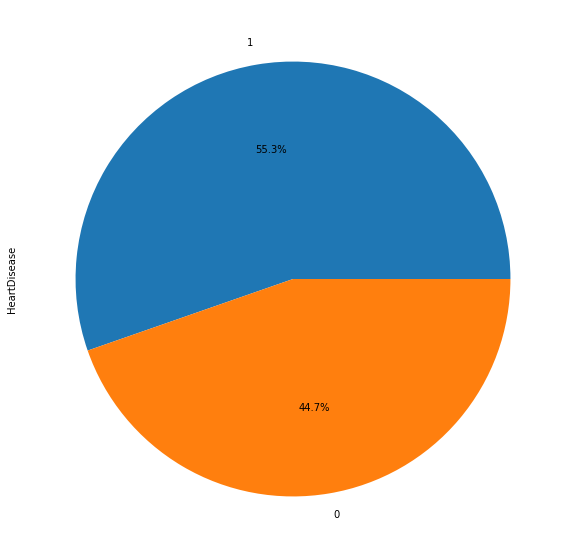

In [ ]:
print(df_y.value_counts())
df_y.value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df_x)

MinMaxScaler()

In [ ]:
df_x=scaler.transform(df_x)

In [ ]:
df_x

array([[0.24489796, 1.        , 0.33333333, ..., 0.        , 0.29545455,
        1.        ],
       [0.42857143, 0.        , 0.66666667, ..., 0.        , 0.40909091,
        0.5       ],
       [0.18367347, 1.        , 0.33333333, ..., 0.        , 0.29545455,
        1.        ],
       ...,
       [0.59183673, 1.        , 0.        , ..., 1.        , 0.43181818,
        0.5       ],
       [0.59183673, 0.        , 0.33333333, ..., 0.        , 0.29545455,
        0.5       ],
       [0.20408163, 1.        , 0.66666667, ..., 0.        , 0.29545455,
        1.        ]])

In [ ]:
df_x.shape

(918, 11)

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df_x=pd.DataFrame(df_x,columns=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])

In [ ]:
df_x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.5,0.788732,0.0,0.295455,1.0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.5,0.676056,0.0,0.409091,0.5
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,1.0,0.267606,0.0,0.295455,1.0
3,0.408163,0.0,0.000000,0.69,0.354892,0.0,0.5,0.338028,1.0,0.465909,0.5
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.5,0.436620,0.0,0.295455,1.0
...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1.0,1.000000,0.55,0.437811,0.0,0.5,0.507042,0.0,0.431818,0.5
914,0.816327,1.0,0.000000,0.72,0.320066,1.0,0.5,0.570423,0.0,0.681818,0.5
915,0.591837,1.0,0.000000,0.65,0.217247,0.0,0.5,0.387324,1.0,0.431818,0.5
916,0.591837,0.0,0.333333,0.65,0.391376,0.0,0.0,0.802817,0.0,0.295455,0.5


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,train_size=0.7)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(solver='liblinear',penalty='l2', max_iter=5000,C=10000.0,random_state=2022)
clf.fit(x_train,y_train)
ypred=clf.predict(x_test)
print(accuracy_score(ypred,y_test))

clf2=LogisticRegression(solver='liblinear',penalty='l2', max_iter=5000,C=10000.0,random_state=2022)
cross_val_score(clf2,x_train,y_train,cv=5).mean()


0.8152173913043478


0.8691981589147286

In [ ]:
param_lreg = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'max_iter' : [100, 1000,2500, 5000]
    }
]
lreg_rcv=LogisticRegression(solver='liblinear')
clf_reg=RandomizedSearchCV(lreg_rcv,param_lreg)
clf_reg.fit(x_train,y_train)
print(accuracy_score(clf_reg.predict(x_test),y_test))
clf_reg.best_params_

# Gaussian Naive Bayes

In [ ]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
yp_gnb=gnb.predict(x_test)
print(accuracy_score(yp_gnb,y_test))

gnb_kfold=GaussianNB()
cross_val_score(gnb_kfold,x_train,y_train,cv=5).mean()

0.8152173913043478


0.8582727713178293

In [ ]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

NB_rcv=GaussianNB()
clf_NB=RandomizedSearchCV(NB_rcv,params_NB)
clf_NB.fit(x_train,y_train)
print(accuracy_score(clf_NB.predict(x_test),y_test))

clf_NB.best_params_

0.8152173913043478


{'var_smoothing': 0.0002310129700083158}

# Support Vector Classifier

In [ ]:
svc=SVC(kernel='rbf',gamma=1.4,C=1,random_state=2022)
svc.fit(x_train,y_train)
yp_svc=svc.predict(x_test)
print(accuracy_score(yp_svc,y_test))

svc_kfold=SVC(kernel='rbf',gamma=1.4,C=1,random_state=2022)
cross_val_score(svc_kfold,x_train,y_train,cv=5).mean()



0.8333333333333334


0.8754118217054263

In [ ]:
para5 = {'C': [0.1, 1, 10, 100, 1000],

               }
svc_rcv=SVC(kernel='rbf',gamma=1.4)
clf_svc=RandomizedSearchCV(svc_rcv,para5)
clf_svc.fit(x_train,y_train)
print(accuracy_score(clf_svc.predict(x_test),y_test))

clf_svc.best_params_

# Decision Tree Classifier

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
yp_dt=dt.predict(x_test)
print(accuracy_score(yp_dt,y_test))

dt_kfold=DecisionTreeClassifier()
cross_val_score(dt_kfold,df_x,df_y,cv=5).mean()

0.8043478260869565


0.7460857685911143

In [ ]:
# plt.figure(figsize=(30,10))
# plot_tree(dt, filled=True)
# plt.title("Decision tree")
# plt.show()

# Random Forest Classifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=350,criterion="entropy",random_state=2022,bootstrap=True,max_features='auto',min_samples_leaf=2,min_samples_split=6)
rfc.fit(x_train,y_train)
yp_rfc=rfc.predict(x_test)
print(accuracy_score(yp_rfc,y_test))

rfc=RandomForestClassifier(n_estimators=350,criterion="entropy",random_state=2022,bootstrap=True,max_features='auto',min_samples_leaf=2,min_samples_split=6)
cross_val_score(rfc,x_train,y_train,cv=5).mean()

0.8731884057971014


0.875423934108527

In [ ]:
para4={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 }
rcf_rcv=RandomForestClassifier(criterion="entropy")
clf_rcf=RandomizedSearchCV(rcf_rcv,para4)
clf_rcf.fit(x_train,y_train)
print(accuracy_score(clf_rcf.predict(x_test),y_test))
clf_rcf.best_params_

0.8695652173913043


{'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [ ]:
# 0.8876811594202898
# {'min_samples_split': 5,
#  'min_samples_leaf': 2,
#  'max_features': 'auto',
#  'max_depth': 60,
#  'bootstrap': True}


# XGB Classifier

In [ ]:
xgb=XGBClassifier(max_features=3, n_estimators=85,min_child_weight=12,max_depth=7,learning_rate=0.3,gamma=0.0,colsample_bytree=0.7)
xgb.fit(x_train,y_train)
yp_xgb=xgb.predict(x_test)
print(accuracy_score(yp_xgb,y_test))

xgb_kfold=XGBClassifier(max_features=3, n_estimators=85,min_child_weight=12,max_depth=7,learning_rate=0.3,gamma=0.0,colsample_bytree=0.7)
cross_val_score(xgb_kfold,x_train,y_train,cv=5).mean()

[21:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.8768115942028986
[21:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might 

0.8645106589147286

In [ ]:
para={"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 7,8,9,10,11,12, 15],
 "min_child_weight" : [7,8 ,9,10],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}

xgb_rcv=XGBClassifier(max_features=3, n_estimators=85)
clf_xgb = RandomizedSearchCV(xgb_rcv, para)
clf_xgb.fit(x_train,y_train)
print(accuracy_score(clf_xgb.predict(x_test),y_test))
clf_xgb.best_params_

[21:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  Thi

{'min_child_weight': 7,
 'max_depth': 15,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [ ]:
#from xgboost import plot_tree


In [ ]:
# fig, ax = plt.subplots(figsize=(30, 30))
# plot_tree(xgb,num_trees=0,rankdir="LR",ax=ax)
# plt.show()

# KNN Classifier

In [ ]:
knn=KNeighborsClassifier(weights='distance', n_neighbors=9,metric='manhattan')
knn.fit(x_train,y_train)
yp_knn=knn.predict(x_test)
print(accuracy_score(yp_knn,y_test))

knn_kfold=KNeighborsClassifier(weights='distance', n_neighbors=9,metric='manhattan')
cross_val_score(knn_kfold,x_train,y_train,cv=5).mean()



0.8297101449275363


0.8691981589147286

In [ ]:
para3={ 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_rcv=KNeighborsClassifier()
clf_knn=RandomizedSearchCV(knn_rcv,para3)
clf_knn.fit(x_train,y_train)

print(accuracy_score(clf_knn.predict(x_test),y_test))

clf_knn.best_params_

0.8442028985507246


{'weights': 'distance', 'n_neighbors': 15, 'metric': 'manhattan'}

# Ada Boost Classifier

In [ ]:
ab = AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=101)
ab.fit(x_train, y_train)
yp_ab=ab.predict(x_test)
print(accuracy_score(yp_ab,y_test))

ab_kfold=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=101)
cross_val_score(ab_kfold,x_train,y_train,cv=5).mean()

0.855072463768116


0.8567587209302324

In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
y_new=data["HeartDisease"]
x_new=data.drop(columns="HeartDisease")

In [ ]:
from collections import Counter

In [ ]:
print(Counter(x_new["ChestPainType"]))
print(Counter(x_new["Sex"]))
print(Counter(x_new["FastingBS"]))
print(Counter(x_new["RestingECG"]))
print(Counter(x_new["ExerciseAngina"]))
print(Counter(x_new["ST_Slope"]))

Counter({'ASY': 496, 'NAP': 203, 'ATA': 173, 'TA': 46})
Counter({'M': 725, 'F': 193})
Counter({0: 704, 1: 214})
Counter({'Normal': 552, 'LVH': 188, 'ST': 178})
Counter({'N': 547, 'Y': 371})
Counter({'Flat': 460, 'Up': 395, 'Down': 63})


In [ ]:
x_new

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,train_size=0.9)

In [ ]:
nomi_col=[2,6,10]
ordi_col=[1,8]
num_col=[0,3,4,5,7,9]
trans = make_column_transformer((OneHotEncoder(sparse=False),nomi_col),
                               (OrdinalEncoder(),ordi_col),
                               (MinMaxScaler(),num_col),
                                remainder='passthrough')
set_config(display='diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 [2, 6, 10]),
                                ('ordinalencoder', OrdinalEncoder(), [1, 8]),
                                ('minmaxscaler', MinMaxScaler(),
                                 [0, 3, 4, 5, 7, 9])])

In [ ]:
model1=SVC(kernel='rbf',gamma=1.4,C=1)
model2=KNeighborsClassifier(weights='distance', n_neighbors=9,metric='manhattan')
model3=RandomForestClassifier(n_estimators=350,criterion="entropy",random_state=2022,bootstrap=True,max_features='auto',min_samples_leaf=2,min_samples_split=6)
model4=XGBClassifier(max_features=3, n_estimators=85,min_child_weight=12,max_depth=7,learning_rate=0.3,gamma=0.0,colsample_bytree=0.7)
model5=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=101)

voting = VotingClassifier(estimators = [('x1',model1), ('x2',model2),('x3',model3),('x4',model4),('x5',model5)],voting = 'hard',verbose=True)
voting_pipe = make_pipeline(trans, voting)

In [ ]:
voting_pipe.fit(xtrain,ytrain)

[Voting] ....................... (1 of 5) Processing x1, total=   0.0s
[Voting] ....................... (2 of 5) Processing x2, total=   0.0s
[Voting] ....................... (3 of 5) Processing x3, total=   0.8s
[21:56:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[Voting] ....................... (4 of 5) Processing x4, total=   0.2s
[Voting] ....................... (5 of 5) Processing x5, total=   0.5s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [2, 6, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 8]),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 3, 4, 5, 7, 9])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('x1', SVC(C=1, gamma=1.4)),
                                              ('x2',
                                               KNeighborsClassifier(metric='m...
                                                             max_bin=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=7,
                                                             max_features=3,
                                                             max_leaves=None,
                                                             min_child_weight=12,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=85,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None,
                                                             reg_alpha=None, ...)),
                                              ('x5',
                                               AdaBoostClassifier(learning_rate=0.05,
                                                                  n_estimators=200,
                                                                  random_state=101))],
                                  verbose=True))])

In [ ]:
print(roc_auc_score(voting_pipe.predict(xtest),ytest))
accuracy_score(voting_pipe.predict(xtest),ytest)

0.8371212121212122


0.8369565217391305

In [ ]:
yy=voting_pipe.predict(xtest)

In [ ]:
Counter(yy)

Counter({1: 48, 0: 44})

In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(voting_pipe, file)